## importing

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer



## data 

In [9]:


# بارگذاری دیتاست
df = pd.read_parquet('formation_damage_dataset.parquet')

# انتخاب ستون‌های عددی
numeric_cols = df.select_dtypes(include=[np.number]).columns

# جایگزینی با میانگین هر ستون
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# ذخیره دیتاست جدید
df.to_parquet('formation_damage_dataset_imputed.parquet', index=False)

print("✅ مقادیر گمشده با میانگین جایگزین شد و فایل جدید ذخیره گردید.")

/var/folders/h6/b2jjhg455c96t90y3vmwvjvw0000gn/T/ipykernel_3048/394153482.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


✅ مقادیر گمشده با میانگین جایگزین شد و فایل جدید ذخیره گردید.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# بارگذاری دیتاست
try:
    df = pd.read_parquet('formation_damage_dataset_imputed.parquet')
    print("✅ دیتاست با موفقیت بارگذاری شد")
except:
    df = pd.read_parquet('formation_damage_dataset.parquet')
    print("⚠ دیتاست ایمپیوت شده یافت نشد، از دیتاست اصلی استفاده شد")

# نمایش اطلاعات اولیه
print("\n🔍 اطلاعات اولیه دیتاست:")
print(f"تعداد سطرها: {df.shape[0]}")
print(f"تعداد ستون‌ها: {df.shape[1]}")
print("\nنمونه داده‌ها:")
display(df.head())

# تحلیل ستون‌ها
print("\n📊 تحلیل ستون‌ها:")
print(df.info())

# آمار توصیفی
print("\n📈 آمار توصیفی داده‌های عددی:")
display(df.describe())

# بررسی مقادیر منحصربفرد در ستون‌های غیرعددی
print("\n🌈 مقادیر منحصربفرد در ستون‌های غیرعددی:")
for col in df.select_dtypes(exclude=[np.number]).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

✅ دیتاست با موفقیت بارگذاری شد

🔍 اطلاعات اولیه دیتاست:
تعداد سطرها: 1000000
تعداد ستون‌ها: 39

نمونه داده‌ها:


,well_id,spud_date,completion_date,depth,porosity,permeability,pressure,temperature,clay_content,illite_content,...,perforation_density,stimulation_method,brittleness_index,clay_reactivity,stress_ratio,fluid_incompatibility,damage_type,damage_severity,initial_production,production_decline
0,HZ-0000001,2022-12-07,2024-12-06,3374.540039,4.279419,193.985367,5038.383301,151.574905,5.289656,5.594754,...,11.754776,Fracturing,0.917820,5.581854,3.448171,0.2,Rock_Fluid_Interactions,16.700001,5.717138,0.562987
1,HZ-0000002,2020-06-22,2024-06-04,3950.714355,7.210227,293.664398,5266.773926,174.832428,12.698468,5.128607,...,5.859755,Fracturing,0.852323,5.318137,3.078798,0.2,Rock_Fluid_Interactions,16.000000,5.981414,0.530915
2,HZ-0000003,2021-06-22,2024-11-23,3731.993896,6.013955,101.377129,6534.315430,171.071762,20.501341,4.063668,...,6.316290,Acidizing,0.764413,2.556561,4.043629,0.8,Cracking_Corrosion_Stress,9.200000,8.112399,0.630021
3,HZ-0000004,2021-04-08,2024-05-23,3598.658447,5.887008,101.760353,6496.281738,172.302719,24.235889,11.459468,...,11.044455,Fracturing,0.651456,10.436616,4.169043,0.8,Rock_Fluid_Interactions,31.299999,5.000000,0.622476
4,HZ-0000005,2023-04-27,2024-08-31,3156.018555,6.076229,295.366180,6941.505859,162.490387,38.707935,2.091349,...,9.207957,Acidizing,0.612662,3.036314,5.079562,0.2,Cracking_Corrosion_Stress|Rock_Fluid_Interactions,10.100000,11.078163,0.761736



📊 تحلیل ستون‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   well_id                1000000 non-null  object 
 1   spud_date              1000000 non-null  object 
 2   completion_date        1000000 non-null  object 
 3   depth                  1000000 non-null  float32
 4   porosity               1000000 non-null  float32
 5   permeability           1000000 non-null  float32
 6   pressure               1000000 non-null  float32
 7   temperature            1000000 non-null  float32
 8   clay_content           1000000 non-null  float32
 9   illite_content         1000000 non-null  float32
 10  kaolinite_content      1000000 non-null  float32
 11  iron_content           1000000 non-null  float32
 12  quartz_content         1000000 non-null  float32
 13  calcite_content        1000000 non-null  float32
 14  f

,depth,porosity,permeability,pressure,temperature,clay_content,illite_content,kaolinite_content,iron_content,quartz_content,...,ecd,overbalance,perforation_density,brittleness_index,clay_reactivity,stress_ratio,fluid_incompatibility,damage_severity,initial_production,production_decline
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,3500.335449,5.998125,167.576889,6000.069824,162.497223,22.498320,7.499910,10.005291,2.550605,49.978306,...,12.000490,500.338470,8.000089,0.739339,6.877861,3.985949,0.377604,20.789005,6.290434,0.649930
std,288.591125,0.960187,83.612617,577.196960,7.216831,10.112534,4.218693,5.627400,1.414872,11.541588,...,1.154804,173.195129,2.310854,0.101318,3.034128,0.507370,0.263855,8.803316,1.661600,0.086579
min,3000.000488,4.000000,50.000000,5000.000977,150.000015,5.000012,0.000014,0.000009,0.100002,30.000097,...,10.000000,200.000473,4.000002,0.434923,0.006223,2.888100,0.200000,3.600000,5.000000,0.500000
25%,3250.340271,5.323690,108.077213,5500.294434,156.245800,13.731309,3.955536,5.273164,1.324405,39.987908,...,11.001276,350.347206,5.997487,0.664203,4.591193,3.608846,0.200000,13.500000,5.000000,0.574936
50%,3500.555908,5.998242,153.524574,5999.568115,162.499016,22.506595,7.499910,10.005288,2.551331,49.973013,...,12.001636,500.336044,7.998046,0.735187,6.784373,3.959109,0.200000,20.400000,5.287635,0.649974
75%,3750.096741,6.671758,203.834873,6500.332886,168.740978,31.267983,11.047240,14.747360,3.775950,59.959858,...,12.999261,650.546463,10.002064,0.819787,9.049464,4.333504,0.800000,27.100000,7.398566,0.724885
max,3999.998291,8.000000,500.000000,6999.999512,175.000000,39.999973,14.999980,19.999994,4.999999,69.999977,...,13.999994,799.999023,11.999994,0.948756,16.460375,5.386295,0.800000,49.400002,15.471623,0.800000



🌈 مقادیر منحصربفرد در ستون‌های غیرعددی:

well_id:
well_id
HZ-0000001    1
HZ-0666658    1
HZ-0666660    1
HZ-0666661    1
HZ-0666662    1
             ..
HZ-0333338    1
HZ-0333339    1
HZ-0333340    1
HZ-0333341    1
HZ-1000000    1
Name: count, Length: 1000000, dtype: int64

spud_date:
spud_date
2020-10-13    791
2023-08-09    779
2022-02-10    765
2024-03-30    765
2023-07-06    764
             ... 
2022-01-30    619
2020-07-09    618
2022-02-05    616
2023-11-07    613
2022-10-08    600
Name: count, Length: 1461, dtype: int64

completion_date:
completion_date
2025-03-01    2940
2024-09-13    2890
2025-05-02    2870
2025-01-10    2855
2024-10-12    2846
              ... 
2024-09-24    2619
2024-07-05    2618
2024-12-25    2617
2024-11-12    2612
2024-09-30    2560
Name: count, Length: 366, dtype: int64

fluid_type:
fluid_type
Water-Based    599741
Oil-Based      300535
Synthetic       99724
Name: count, dtype: int64

completion_type:
completion_type
Cased Hole       499198
Open H

🏷️ گزینه‌های ستون هدف:
📌 طبقه‌بندی: ['damage_type', 'fluid_type', 'completion_type', 'stimulation_method']
📊 رگرسیون: ['damage_severity', 'initial_production', 'production_decline']

⏳ در حال پردازش داده‌ها...
✅ پردازش داده‌ها تکمیل شد (زمان: 0.77 ثانیه)

🔨 در حال ساخت مدل Random Forest برای مسئله رگرسیون...
✅ آموزش مدل تکمیل شد (زمان: 336.82 ثانیه)

📊 نتایج ارزیابی:
MSE: 0.0003214415041951468
R2 Score: 0.9999958516119603


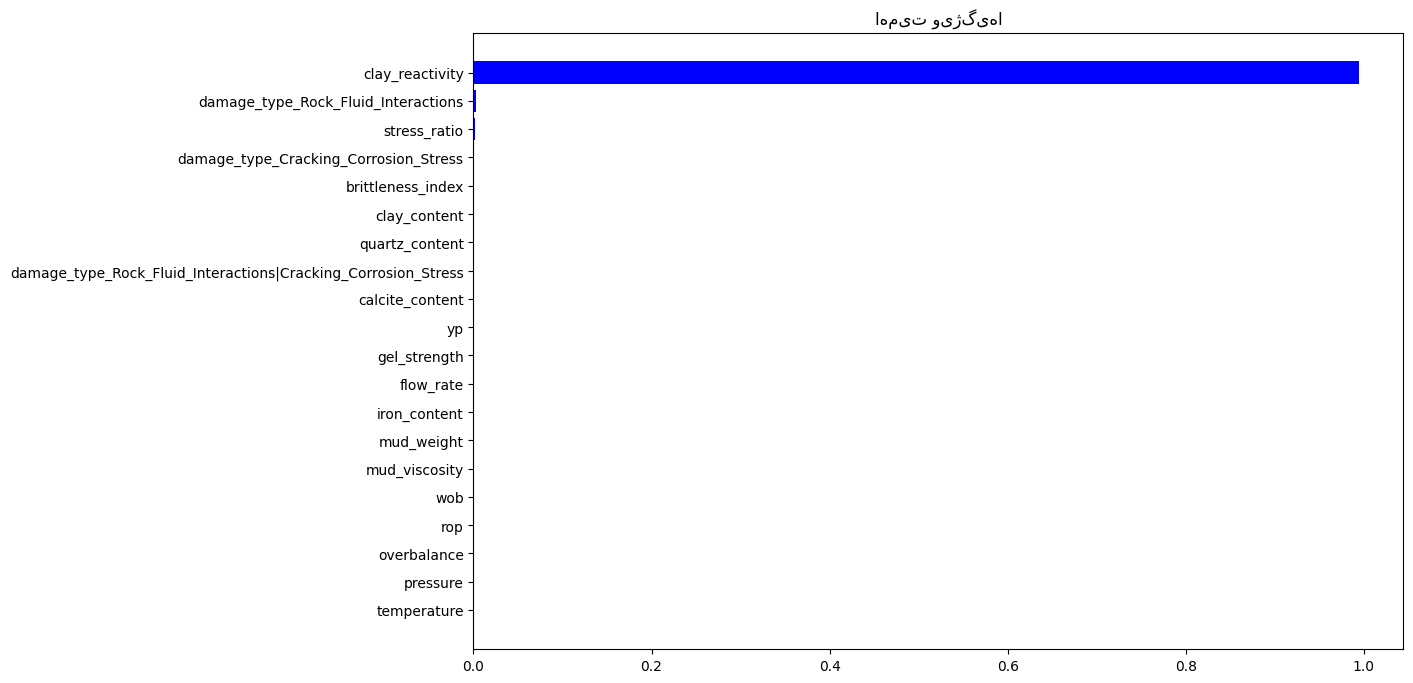

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, 
                             mean_squared_error, r2_score, accuracy_score)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# بارگذاری داده‌ها
df = pd.read_parquet('formation_damage_dataset_imputed.parquet')

# 1. پیش‌پردازش داده‌ها --------------------------------------------------------

# تبدیل تاریخ‌ها به ویژگی‌های عددی
df['spud_date'] = pd.to_datetime(df['spud_date'])
df['completion_date'] = pd.to_datetime(df['completion_date'])
df['drilling_days'] = (df['completion_date'] - df['spud_date']).dt.days

# شناسایی ستون‌های عددی و غیرعددی
numeric_cols = df.select_dtypes(include=['float32', 'float64', 'int']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# حذف ستون‌های غیرضروری
cols_to_drop = ['well_id', 'spud_date', 'completion_date']
df = df.drop(cols_to_drop, axis=1)

# به‌روزرسانی لیست ستون‌ها پس از حذف
numeric_cols = [col for col in numeric_cols if col not in cols_to_drop]
categorical_cols = [col for col in categorical_cols if col not in cols_to_drop]

# 2. مهندسی ویژگی‌ها ----------------------------------------------------------

# هدف‌های ممکن برای مدل‌سازی
target_options = {
    'classification': ['damage_type', 'fluid_type', 'completion_type', 'stimulation_method'],
    'regression': ['damage_severity', 'initial_production', 'production_decline']
}

print("🏷️ گزینه‌های ستون هدف:")
print("📌 طبقه‌بندی:", target_options['classification'])
print("📊 رگرسیون:", target_options['regression'])

# انتخاب ستون هدف (در اینجا damage_severity را انتخاب می‌کنیم)
target_col = 'damage_severity'

# 3. پردازش داده‌ها -----------------------------------------------------------

# پردازش ستون‌های دسته‌ای
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X = df.drop(target_col, axis=1)
y = df[target_col]

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# پردازش ویژگی‌ها
print("\n⏳ در حال پردازش داده‌ها...")
start_time = time.time()
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"✅ پردازش داده‌ها تکمیل شد (زمان: {time.time()-start_time:.2f} ثانیه)")

# 4. ساخت و ارزیابی مدل ------------------------------------------------------

# تشخیص نوع مسئله
if target_col in target_options['classification']:
    problem_type = 'طبقه‌بندی'
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
else:
    problem_type = 'رگرسیون'
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print(f"\n🔨 در حال ساخت مدل Random Forest برای مسئله {problem_type}...")

# آموزش مدل
start_time = time.time()
model.fit(X_train_processed, y_train)
print(f"✅ آموزش مدل تکمیل شد (زمان: {time.time()-start_time:.2f} ثانیه)")

# پیش‌بینی
y_pred = model.predict(X_test_processed)

# ارزیابی مدل
print("\n📊 نتایج ارزیابی:")
if problem_type == 'طبقه‌بندی':
    print("دقت (Accuracy):", accuracy_score(y_test, y_pred))
    print("\nگزارش طبقه‌بندی:")
    print(classification_report(y_test, y_pred))
else:
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

# 5. تحلیل اهمیت ویژگی‌ها ---------------------------------------------------

# نام ویژگی‌ها پس از پردازش
if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
else:
    cat_features = []
    
all_features = list(cat_features) + numeric_cols

# نمایش اهمیت ویژگی‌ها
plt.figure(figsize=(12, 8))
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # نمایش 20 ویژگی مهم
plt.title('اهمیت ویژگی‌ها')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.show()


📊 گزارش طبقه‌بندی:
                                                   precision    recall  f1-score   support

                        Cracking_Corrosion_Stress       0.89      0.37      0.53     20085
Cracking_Corrosion_Stress|Rock_Fluid_Interactions       0.13      0.49      0.20      5612
                          Rock_Fluid_Interactions       1.00      0.89      0.94    168685
Rock_Fluid_Interactions|Cracking_Corrosion_Stress       0.12      0.44      0.19      5618

                                         accuracy                           0.81    200000
                                        macro avg       0.53      0.55      0.47    200000
                                     weighted avg       0.94      0.81      0.86    200000


📌 ماتریس درهم‌ریختگی:


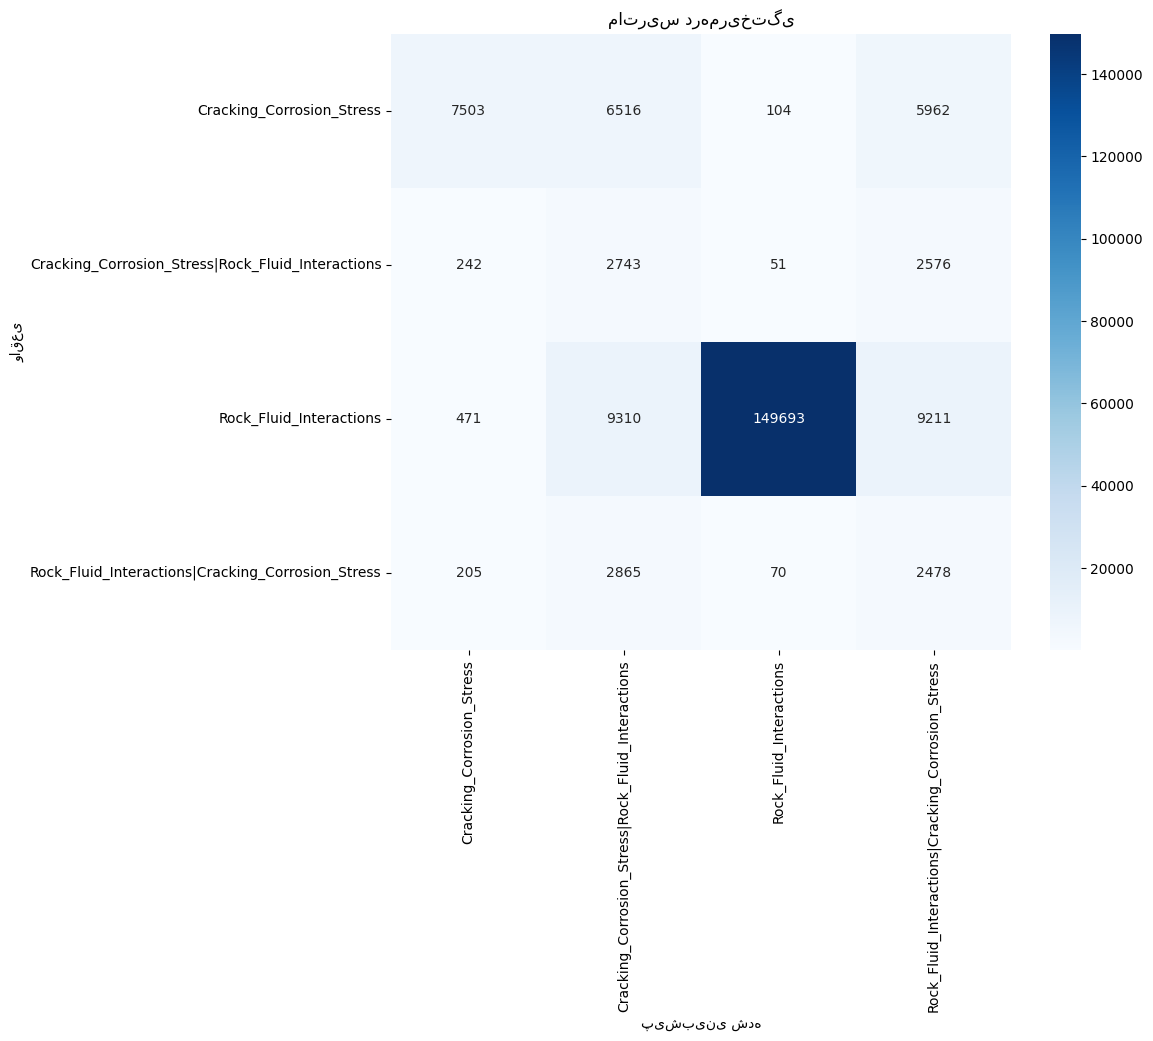

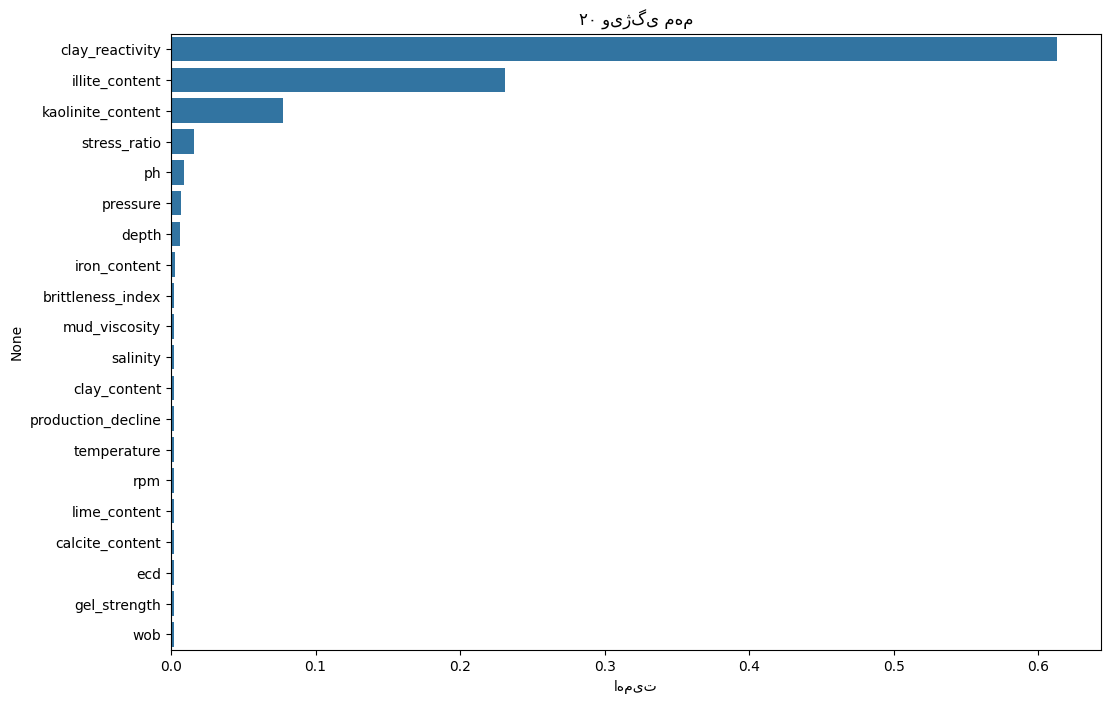

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,f1_score)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. بارگذاری و آماده‌سازی داده‌ها
df = pd.read_parquet('formation_damage_dataset_imputed.parquet')

# حذف ستون‌های غیرضروری
cols_to_drop = ['initial_production', 'damage_severity', 
                'well_id', 'spud_date', 'completion_date']
df = df.drop(cols_to_drop, axis=1)

# 2. تعریف ویژگی‌ها و هدف
X = df.drop('damage_type', axis=1)
y = df['damage_type']

# شناسایی ستون‌های عددی و دسته‌ای
numeric_cols = X.select_dtypes(include=['float32', 'float64', 'int']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 3. پیش‌پردازش داده‌ها
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# 4. تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

# 5. ساخت و آموزش مدل
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # برای مقابله با عدم تعادل کلاس‌ها
)

model.fit(X_train, y_train)

# 6. ارزیابی مدل
y_pred = model.predict(X_test)

print("\n📊 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

print("\n📌 ماتریس درهم‌ریختگی:")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.title('ماتریس درهم‌ریختگی')
plt.show()

# 7. تحلیل اهمیت ویژگی‌ها
feature_names = (list(preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_cols)) + numeric_cols)
importances = model.feature_importances_
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('۲۰ ویژگی مهم')
plt.xlabel('اهمیت')
plt.show()